<a href="https://colab.research.google.com/github/MariaGodoi/cn1t2/blob/main/Quest%C3%A3o_7_Fisqui_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOLUÇÃO DA QUESTÃO 7 - VOLUME DE EXCESSO DE MISTURAS BINÁRIAS

DADOS EXPERIMENTAIS - METANOL/ACETATO DE ETILA
 X_metanol  V_E (cm³/mol)  Densidade (g/cm³)
    0.0000          0.000             0.8941
    0.1719         -0.050             0.8860
    0.3219         -0.069             0.8771
    0.4856         -0.072             0.8647
    0.5810         -0.074             0.8557
    0.6871         -0.072             0.8438
    0.7433         -0.068             0.8363
    0.7871         -0.056             0.8298
    0.8362         -0.058             0.8218
    0.9175         -0.031             0.8061
    0.9689         -0.012             0.7943
    1.0000          0.000             0.7862

DADOS EXPERIMENTAIS - ETANOL/NITROMETANO
 X_etanol  V_E (cm³/mol)
   0.0000          0.000
   0.1000          0.052
   0.1961          0.060
   0.3436          0.051
   0.4043          0.043
   0.4393          0.026
   0.4734          0.015
   0.5033          0.006
   0.6077         -0.023
   0.7005    

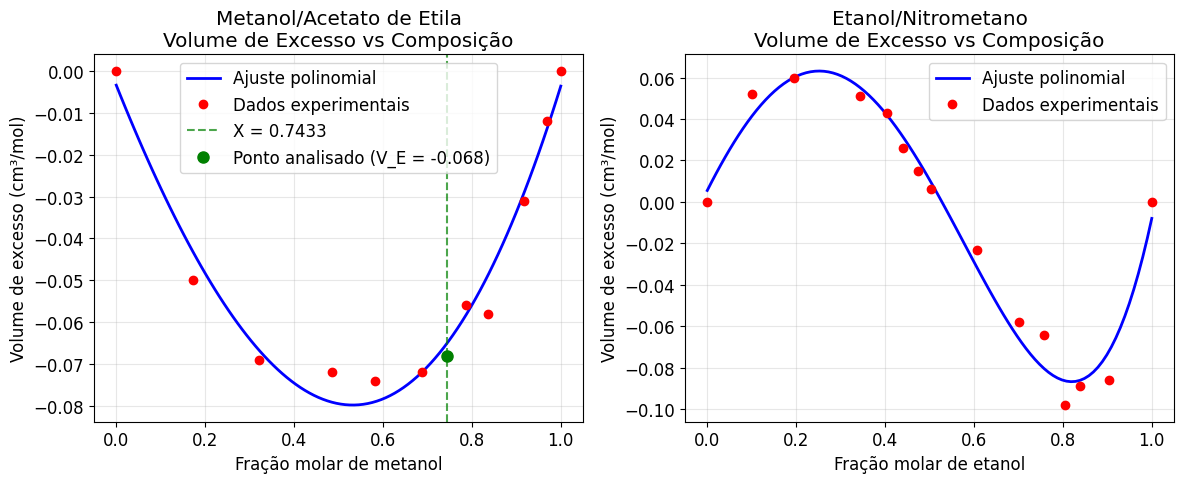


b) ANÁLISE DO SISTEMA ETANOL/NITROMETANO
Volume de excesso máximo: 0.060 cm³/mol em X_etanol = 0.196
Volume de excesso mínimo: -0.098 cm³/mol em X_etanol = 0.804

INTERPRETAÇÃO:
O comportamento do volume de excesso para a mistura etanol/nitrometano mostra:
1. Volume de excesso POSITIVO em baixas frações molares de etanol
   → Indica predominância de forças repulsivas entre moléculas diferentes
   → As moléculas tendem a se afastar, aumentando o volume da mistura
2. Volume de excesso NEGATIVO em altas frações molares de etanol
   → Indica predominância de forças atrativas entre moléculas diferentes
   → Formação de complexos ou interações específicas que compactam a estrutura
3. Ponto de inflexão em torno de X_etanol ≈ 0.2-0.3
   → Mudança no comportamento das interações moleculares
   → Possível formação de estruturas associativas diferentes

Integral do volume de excesso: -0.0044 cm³/mol
Valor próximo de zero indica compensação entre regiões positiva e negativa


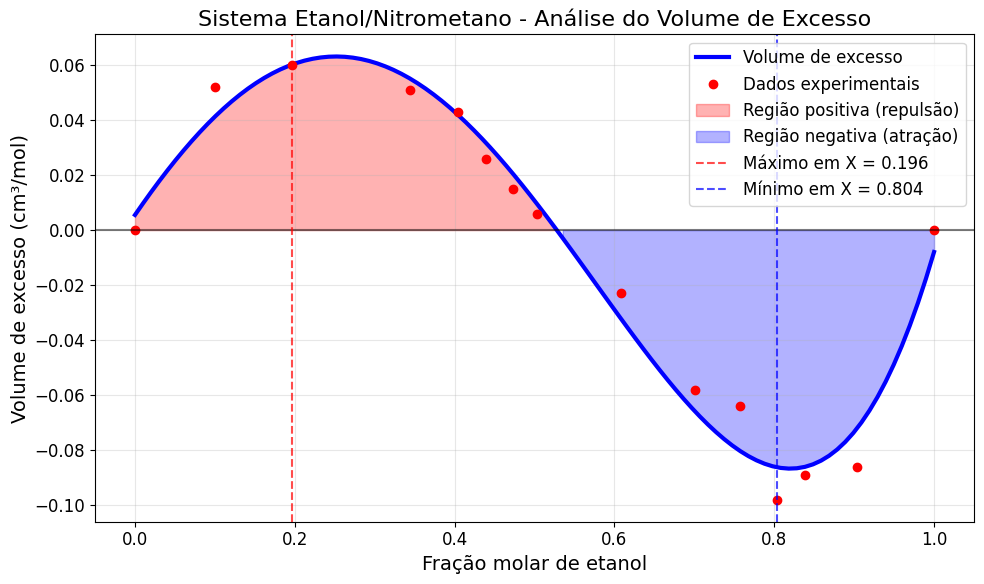


CONCLUSÕES
1. Para metanol/acetato de etila em X = 0.7433:
   - Volume molar parcial do metanol: -0.0287 cm³/mol
   - Volume molar parcial do acetato de etila: -0.1707 cm³/mol
   - Valores negativos indicam contração volumétrica na mistura

2. Para etanol/nitrometano:
   - Comportamento não-monotônico com máximo positivo e mínimo negativo
   - Indica transição entre diferentes regimes de interação molecular
   - Típico de sistemas com interações específicas e formação de complexos


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit
import pandas as pd

# Configurações para os gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("=" * 80)
print("SOLUÇÃO DA QUESTÃO 7 - VOLUME DE EXCESSO DE MISTURAS BINÁRIAS")
print("=" * 80)

# Dados fornecidos
print("\nDADOS EXPERIMENTAIS - METANOL/ACETATO DE ETILA")
print("=" * 50)

# Dados para metanol/acetato de etila
x_metanol = np.array([0.0000, 0.1719, 0.3219, 0.4856, 0.5810, 0.6871,
                      0.7433, 0.7871, 0.8362, 0.9175, 0.9689, 1.0000])
V_E_metanol = np.array([0.0000, -0.0500, -0.0690, -0.0720, -0.0740, -0.0720,
                       -0.0680, -0.0560, -0.0580, -0.0310, -0.0120, 0.0000])
densidade = np.array([0.8941, 0.8860, 0.8771, 0.8647, 0.8557, 0.8438,
                      0.8363, 0.8298, 0.8218, 0.8061, 0.7943, 0.7862])

# Criar DataFrame para melhor visualização
df_metanol = pd.DataFrame({
    'X_metanol': x_metanol,
    'V_E (cm³/mol)': V_E_metanol,
    'Densidade (g/cm³)': densidade
})
print(df_metanol.to_string(index=False))

print("\nDADOS EXPERIMENTAIS - ETANOL/NITROMETANO")
print("=" * 50)

# Dados para etanol/nitrometano
x_etanol = np.array([0.0000, 0.1000, 0.1961, 0.3436, 0.4043, 0.4393,
                     0.4734, 0.5033, 0.6077, 0.7005, 0.7567, 0.8039,
                     0.8386, 0.9039, 1.0000])
V_E_etanol = np.array([0.000, 0.052, 0.060, 0.051, 0.043, 0.026,
                      0.015, 0.006, -0.023, -0.058, -0.064, -0.098,
                      -0.089, -0.086, 0.000])

df_etanol = pd.DataFrame({
    'X_etanol': x_etanol,
    'V_E (cm³/mol)': V_E_etanol
})
print(df_etanol.to_string(index=False))

# =============================================================================
# a) CÁLCULO DOS VOLUMES MOLARES PARCIAIS PARA METANOL/ACETATO DE ETILA
# =============================================================================

print("\n" + "=" * 80)
print("a) VOLUMES MOLARES PARCIAIS EM X_metanol = 0.7433")
print("=" * 80)

def calcular_volumes_parciais(x, V_E, x_alvo=0.7433):
    """
    Calcula os volumes molares parciais usando o método da tangente
    """
    # Ajuste polinomial aos dados
    coeffs = np.polyfit(x, V_E, 3)
    poly = np.poly1d(coeffs)

    # Derivada do polinômio
    deriv_coeffs = np.polyder(coeffs)
    deriv_poly = np.poly1d(deriv_coeffs)

    # Volume de excesso no ponto alvo
    V_E_alvo = poly(x_alvo)

    # Derivada no ponto alvo
    dV_dx_alvo = deriv_poly(x_alvo)

    # Volumes molares parciais
    V1_parcial = V_E_alvo + (1 - x_alvo) * dV_dx_alvo  # Para metanol
    V2_parcial = V_E_alvo - x_alvo * dV_dx_alvo        # Para acetato de etila

    return V1_parcial, V2_parcial, poly, deriv_poly

# Cálculo para X_metanol = 0.7433
V_metanol_parcial, V_acetato_parcial, poly_fit, deriv_poly = calcular_volumes_parciais(
    x_metanol, V_E_metanol, 0.7433
)

print(f"Volume de excesso em X_metanol = 0.7433: {V_E_metanol[6]:.4f} cm³/mol")
print(f"Volume molar parcial do METANOL: {V_metanol_parcial:.4f} cm³/mol")
print(f"Volume molar parcial do ACETATO DE ETILA: {V_acetato_parcial:.4f} cm³/mol")

# Gráfico para metanol/acetato de etila
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
x_fit = np.linspace(0, 1, 100)
V_E_fit = poly_fit(x_fit)

plt.plot(x_fit, V_E_fit, 'b-', label='Ajuste polinomial', linewidth=2)
plt.plot(x_metanol, V_E_metanol, 'ro', markersize=6, label='Dados experimentais')
plt.axvline(x=0.7433, color='g', linestyle='--', alpha=0.7, label='X = 0.7433')

# Destacar o ponto de interesse
idx_alvo = np.where(x_metanol == 0.7433)[0][0]
plt.plot(x_metanol[idx_alvo], V_E_metanol[idx_alvo], 'go', markersize=8,
         label=f'Ponto analisado (V_E = {V_E_metanol[idx_alvo]:.3f})')

plt.xlabel('Fração molar de metanol')
plt.ylabel('Volume de excesso (cm³/mol)')
plt.title('Metanol/Acetato de Etila\nVolume de Excesso vs Composição')
plt.legend()
plt.grid(True, alpha=0.3)

# =============================================================================
# b) GRÁFICO PARA ETANOL/NITROMETANO
# =============================================================================

plt.subplot(1, 2, 2)
# Ajuste polinomial para etanol/nitrometano
coeffs_etanol = np.polyfit(x_etanol, V_E_etanol, 4)
poly_etanol = np.poly1d(coeffs_etanol)
x_fit_etanol = np.linspace(0, 1, 100)
V_E_fit_etanol = poly_etanol(x_fit_etanol)

plt.plot(x_fit_etanol, V_E_fit_etanol, 'b-', label='Ajuste polinomial', linewidth=2)
plt.plot(x_etanol, V_E_etanol, 'ro', markersize=6, label='Dados experimentais')

plt.xlabel('Fração molar de etanol')
plt.ylabel('Volume de excesso (cm³/mol)')
plt.title('Etanol/Nitrometano\nVolume de Excesso vs Composição')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# ANÁLISE DOS RESULTADOS
# =============================================================================

print("\n" + "=" * 80)
print("b) ANÁLISE DO SISTEMA ETANOL/NITROMETANO")
print("=" * 80)

# Encontrar máximo e mínimo
V_E_max = np.max(V_E_etanol)
x_max = x_etanol[np.argmax(V_E_etanol)]
V_E_min = np.min(V_E_etanol)
x_min = x_etanol[np.argmin(V_E_etanol)]

print(f"Volume de excesso máximo: {V_E_max:.3f} cm³/mol em X_etanol = {x_max:.3f}")
print(f"Volume de excesso mínimo: {V_E_min:.3f} cm³/mol em X_etanol = {x_min:.3f}")

# Interpretação qualitativa
print("\nINTERPRETAÇÃO:")
print("O comportamento do volume de excesso para a mistura etanol/nitrometano mostra:")
print("1. Volume de excesso POSITIVO em baixas frações molares de etanol")
print("   → Indica predominância de forças repulsivas entre moléculas diferentes")
print("   → As moléculas tendem a se afastar, aumentando o volume da mistura")

print("2. Volume de excesso NEGATIVO em altas frações molares de etanol")
print("   → Indica predominância de forças atrativas entre moléculas diferentes")
print("   → Formação de complexos ou interações específicas que compactam a estrutura")

print("3. Ponto de inflexão em torno de X_etanol \u2248 0.2-0.3")
print("   → Mudança no comportamento das interações moleculares")
print("   → Possível formação de estruturas associativas diferentes")

# Cálculo da área sob a curva (integral)
integral_V_E = np.trapezoid(V_E_fit_etanol, x_fit_etanol)
print(f"\nIntegral do volume de excesso: {integral_V_E:.4f} cm³/mol")
print("Valor próximo de zero indica compensação entre regiões positiva e negativa")

# Gráfico adicional mostrando a interpretação
plt.figure(figsize=(10, 6))

# Gráfico principal
plt.plot(x_fit_etanol, V_E_fit_etanol, 'b-', linewidth=3, label='Volume de excesso')
plt.plot(x_etanol, V_E_etanol, 'ro', markersize=6, label='Dados experimentais')

# Áreas coloridas para interpretação
plt.fill_between(x_fit_etanol, V_E_fit_etanol, where=V_E_fit_etanol>0,
                 alpha=0.3, color='red', label='Região positiva (repulsão)')
plt.fill_between(x_fit_etanol, V_E_fit_etanol, where=V_E_fit_etanol<0,
                 alpha=0.3, color='blue', label='Região negativa (atração)')

# Linhas de referência
plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
plt.axvline(x=x_max, color='r', linestyle='--', alpha=0.7,
            label=f'Máximo em X = {x_max:.3f}')
plt.axvline(x=x_min, color='b', linestyle='--', alpha=0.7,
            label=f'Mínimo em X = {x_min:.3f}')

plt.xlabel('Fração molar de etanol', fontsize=14)
plt.ylabel('Volume de excesso (cm³/mol)', fontsize=14)
plt.title('Sistema Etanol/Nitrometano - Análise do Volume de Excesso', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CONCLUSÕES")
print("=" * 80)
print("1. Para metanol/acetato de etila em X = 0.7433:")
print(f"   - Volume molar parcial do metanol: {V_metanol_parcial:.4f} cm³/mol")
print(f"   - Volume molar parcial do acetato de etila: {V_acetato_parcial:.4f} cm³/mol")
print("   - Valores negativos indicam contração volumétrica na mistura")

print("\n2. Para etanol/nitrometano:")
print("   - Comportamento não-monotônico com máximo positivo e mínimo negativo")
print("   - Indica transição entre diferentes regimes de interação molecular")
print("   - Típico de sistemas com interações específicas e formação de complexos")

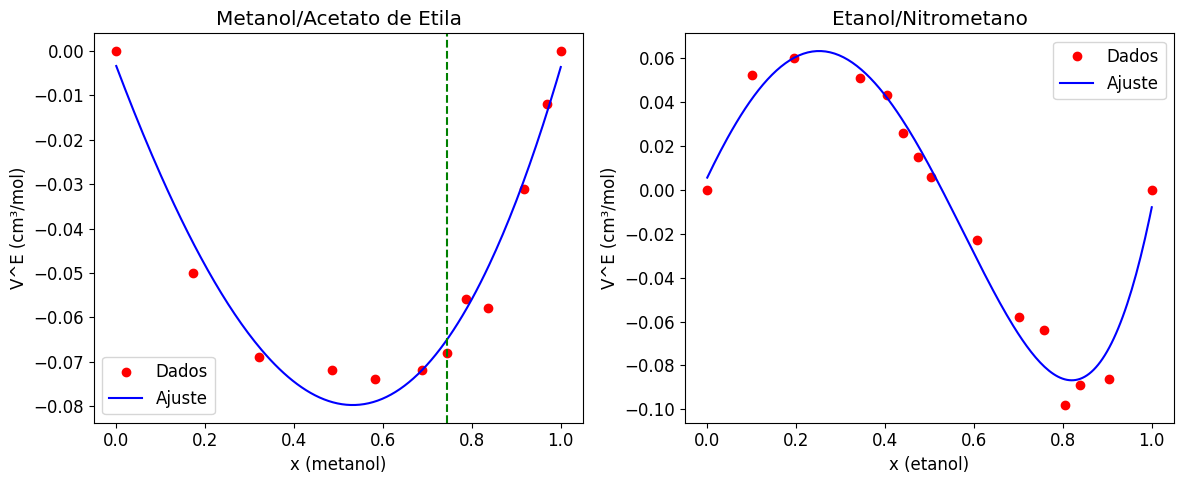

Volumes molares parciais em x = 0.7433:
Metanol = -0.0287 cm³/mol
Acetato de etila = -0.1707 cm³/mol


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy.optimize import curve_fit

# Dados metanol/acetato de etila
x_m = np.array([0.0000,0.1719,0.3219,0.4856,0.5810,0.6871,
                0.7433,0.7871,0.8362,0.9175,0.9689,1.0000])
VEm = np.array([0.0000,-0.0500,-0.0690,-0.0720,-0.0740,-0.0720,
                -0.0680,-0.0560,-0.0580,-0.0310,-0.0120,0.0000])

# Dados etanol/nitrometano
x_e = np.array([0.0000,0.1000,0.1961,0.3436,0.4043,0.4393,
                0.4734,0.5033,0.6077,0.7005,0.7567,0.8039,
                0.8386,0.9039,1.0000])
VEe = np.array([0.000,0.052,0.060,0.051,0.043,0.026,
                0.015,0.006,-0.023,-0.058,-0.064,-0.098,
                -0.089,-0.086,0.000])

# ---- (a) Volumes parciais metanol/acetato ----
def vol_parciais(x, VE, x0):
    p  = np.poly1d(np.polyfit(x, VE, 3))
    dp = np.polyder(p)
    VE0 = p(x0)
    dVE0 = dp(x0)
    V1 = VE0 + (1 - x0)*dVE0
    V2 = VE0 - x0*dVE0
    return V1, V2, p

V1, V2, p_m = vol_parciais(x_m, VEm, 0.7433)

# ---- (b) Gráfico VE(x) etanol/nitrometano ----
p_e = np.poly1d(np.polyfit(x_e, VEe, 4))
xf = np.linspace(0,1,200)

plt.figure(figsize=(12,5))

# Metanol/acetato
plt.subplot(1,2,1)
plt.plot(x_m, VEm, 'ro', label="Dados")
plt.plot(xf, p_m(xf), 'b-', label="Ajuste")
plt.axvline(0.7433, color='g', ls='--')
plt.title("Metanol/Acetato de Etila")
plt.xlabel("x (metanol)")
plt.ylabel("V^E (cm³/mol)")
plt.legend()

# Etanol/nitrometano
plt.subplot(1,2,2)
plt.plot(x_e, VEe, 'ro', label="Dados")
plt.plot(xf, p_e(xf), 'b-', label="Ajuste")
plt.title("Etanol/Nitrometano")
plt.xlabel("x (etanol)")
plt.ylabel("V^E (cm³/mol)")
plt.legend()

plt.tight_layout()
plt.show()

print("Volumes molares parciais em x = 0.7433:")
print(f"Metanol = {V1:.4f} cm³/mol")
print(f"Acetato de etila = {V2:.4f} cm³/mol")